<a href="https://colab.research.google.com/github/ShahJalal-Jamil/Textile-Research/blob/main/My_Code_Textile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step-1:** DataSet Import and Preprocessing

In [3]:
# Dataset load and Pre-processing
!git clone https://github.com/ShahJalal-Jamil/Textile-Research.git
import pandas as pd

df = pd.read_excel(r'/content/Textile-Research/data_textile.xlsx')
df = df.replace('Jersey', 0, regex=True)
df = df.replace('DLacoste', 1, regex=True)
df = df.replace('Fleece', 2, regex=True)
df = df.replace('Lacoste', 3, regex=True)
df = df.replace('Pique', 4, regex=True)
df = df.replace('Plain', 5, regex=True)
df = df.replace('RDenim', 6, regex=True)
df = df.replace('SDenim', 7, regex=True)
df = df.replace('Twill', 8, regex=True)
print (df)

Cloning into 'Textile-Research'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 115.88 KiB | 6.82 MiB/s, done.
Resolving deltas: 100% (6/6), done.
     Fabric Name  ST    MS  SPI  NN    FT  GSM    T_S  Tex     El  \
0              0   5  3500   10   9  0.18  160   4.75   30  15.00   
1              0   6  3800   10   9  0.21  160   5.15   30  15.00   
2              0   5  3600   10   9  0.22  160   5.15   30  15.00   
3              0   4  3500   10   9  0.22  160   5.15   30  17.00   
4              0   5  3500   10   9  0.21  160   5.15   30  15.00   
..           ...  ..   ...  ...  ..   ...  ...    ...  ...    ...   
995            7   6  3000   10  16  0.62  310  11.95  100  26.48   
996            7   5  2800   10  16  0.62  310  10.89  100  26.48   
997            7   7  3000   10  16  0.62  310  

In [4]:
# Data Normalization
c = df.columns
for i in range(0,10):
    if i!= 5:
        column_name = c[i]
        print(column_name)
        l = df[column_name].unique()
        #print (l)
        print(l.size)
        max_value = max(l)
        for j in range(0,l.size):
            df[column_name] = df[column_name].replace(l[j], l[j]/max_value)

Fabric Name
9
ST
4
MS
11
SPI
3
NN
5
GSM
66
T_S
287
Tex
5
El
86


In [5]:
# Data Assigning into X and Y for Traning and Testing
# X = df.drop('target', axis=1)  # Features
# y = df['target']  # Target variable


X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
print(X_new.shape)
print(X_new)

(1000, 10)
(1000,)
(1000, 10)
[[0.         0.71428571 0.875      ... 0.33928571 0.3        0.56646526]
 [0.         0.85714286 0.95       ... 0.36785714 0.3        0.56646526]
 [0.         0.71428571 0.9        ... 0.36785714 0.3        0.56646526]
 ...
 [0.875      1.         0.75       ... 0.87928571 1.         0.98602719]
 [0.875      0.71428571 0.625      ... 0.83571429 1.         1.        ]
 [0.875      0.57142857 0.7        ... 0.85571429 1.         0.91049849]]


**Step2:** Applying Decion Tree Classifier along with K-fold Cross Validation and Reuslts

In [ ]:
# Decion Tree and Results with cross validation

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state= 42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = dt_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)



Metrics (Fold 21):
Accuracy: 0.8000
Precision: 0.8480
Recall: 0.8346
F1 Score: 0.8413
Confusion Matrix:
[[ 54  19]
 [ 21 106]]

Metrics (Fold 41):
Accuracy: 0.8100
Precision: 0.8852
Recall: 0.8182
F1 Score: 0.8504
Confusion Matrix:
[[ 54  14]
 [ 24 108]]

Metrics (Fold 61):
Accuracy: 0.8200
Precision: 0.9231
Recall: 0.8000
F1 Score: 0.8571
Confusion Matrix:
[[ 56   9]
 [ 27 108]]

Metrics (Fold 81):
Accuracy: 0.7850
Precision: 0.8320
Recall: 0.8254
F1 Score: 0.8287
Confusion Matrix:
[[ 53  21]
 [ 22 104]]

Metrics (Fold 101):
Accuracy: 0.7450
Precision: 0.8362
Recall: 0.7519
F1 Score: 0.7918
Confusion Matrix:
[[52 19]
 [32 97]]

Overall Metrics:
Overall Accuracy: 0.7920
Overall Precision: 0.8645
Overall Recall: 0.8059
Overall F1 Score: 0.8341

Overall Confusion Matrix:
[[269  82]
 [126 523]]


In [ ]:
# Decion Tree and Results with LEAVE ONE OUT Method

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Assigning into X and Y for Traning and Testing
# X = df.drop('target', axis=1)  # Features
# y = df['target']  # Target variable

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = dt_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Overall Metrics:
Overall Accuracy: 0.8020
Overall Precision: 0.8551
Overall Recall: 0.8367
Overall F1 Score: 0.8458

Overall Confusion Matrix:
[[259  92]
 [106 543]]


2. Naibe Bayes Classifier along with K-fold Cross Validation and Reuslts

In [ ]:
# Decion Tree and Results with k-fold Cross Validation Method

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Naive Bayes Classifier
nb_classifier = GaussianNB()

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = nb_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Metrics (Fold 21):
Accuracy: 0.7450
Precision: 0.8362
Recall: 0.7519
F1 Score: 0.7918
Confusion Matrix:
[[ 37  36]
 [ 17 110]]

Metrics (Fold 41):
Accuracy: 0.7450
Precision: 0.8362
Recall: 0.7519
F1 Score: 0.7918
Confusion Matrix:
[[ 28  40]
 [ 13 119]]

Metrics (Fold 61):
Accuracy: 0.7450
Precision: 0.8362
Recall: 0.7519
F1 Score: 0.7918
Confusion Matrix:
[[ 26  39]
 [ 15 120]]

Metrics (Fold 81):
Accuracy: 0.7450
Precision: 0.8362
Recall: 0.7519
F1 Score: 0.7918
Confusion Matrix:
[[ 43  31]
 [ 19 107]]

Metrics (Fold 101):
Accuracy: 0.7450
Precision: 0.8362
Recall: 0.7519
F1 Score: 0.7918
Confusion Matrix:
[[ 25  46]
 [ 19 110]]

Overall Metrics:
Overall Accuracy: 0.7250
Overall Precision: 0.7467
Overall Recall: 0.8721
Overall F1 Score: 0.8045

Overall Confusion Matrix:
[[159 192]
 [ 83 566]]


In [ ]:
# Naive Bayes and Results with LEAVE ONE OUT Method

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Naive Bayes Classifier
nb_classifier = GaussianNB()

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = nb_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Overall Metrics:
Overall Accuracy: 0.7260
Overall Precision: 0.7477
Overall Recall: 0.8721
Overall F1 Score: 0.8051

Overall Confusion Matrix:
[[160 191]
 [ 83 566]]


3. K-Nearest Neighbor along with Cross Validation and Results

In [ ]:
# .......K-NN k-fold Cross Validation Method and Results.................

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize K-Nearest Neighbors Classifier with k=3 (we can adjust the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = knn_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Metrics (Fold 11):
Accuracy: 0.7500
Precision: 0.8143
Recall: 0.8261
F1 Score: 0.8201
Confusion Matrix:
[[18 13]
 [12 57]]

Metrics (Fold 21):
Accuracy: 0.8000
Precision: 0.8065
Recall: 0.8621
F1 Score: 0.8333
Confusion Matrix:
[[30 12]
 [ 8 50]]

Metrics (Fold 31):
Accuracy: 0.8300
Precision: 0.8750
Recall: 0.8615
F1 Score: 0.8682
Confusion Matrix:
[[27  8]
 [ 9 56]]

Metrics (Fold 41):
Accuracy: 0.8100
Precision: 0.8529
Recall: 0.8657
F1 Score: 0.8593
Confusion Matrix:
[[23 10]
 [ 9 58]]

Metrics (Fold 51):
Accuracy: 0.8900
Precision: 0.9041
Recall: 0.9429
F1 Score: 0.9231
Confusion Matrix:
[[23  7]
 [ 4 66]]

Metrics (Fold 61):
Accuracy: 0.7700
Precision: 0.8182
Recall: 0.8308
F1 Score: 0.8244
Confusion Matrix:
[[23 12]
 [11 54]]

Metrics (Fold 71):
Accuracy: 0.7400
Precision: 0.8393
Recall: 0.7344
F1 Score: 0.7833
Confusion Matrix:
[[27  9]
 [17 47]]

Metrics (Fold 81):
Accuracy: 0.8000
Precision: 0.8088
Recall: 0.8871
F1 Score: 0.8462
Confusion Matrix:
[[25 13]

In [ ]:
# .........K-NN along with Leave-One-Out Method and Results............


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize K-Nearest Neighbors Classifier with k=3 (you can adjust the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = knn_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Overall Metrics:
Overall Accuracy: 0.8220
Overall Precision: 0.8595
Overall Recall: 0.8675
Overall F1 Score: 0.8635

Overall Confusion Matrix:
[[259  92]
 [ 86 563]]


4. Schotasting Gradient Descent algorithm along with Validation and Results

In [ ]:
# .........Schotasting Gradient Descent with K-fold Method and Results............

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize Stochastic Gradient Descent Classifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    sgd_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = sgd_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Metrics (Fold 21):
Accuracy: 0.8000
Precision: 0.8372
Recall: 0.8504
F1 Score: 0.8438
Confusion Matrix:
[[ 52  21]
 [ 19 108]]

Metrics (Fold 41):
Accuracy: 0.7600
Precision: 0.9200
Recall: 0.6970
F1 Score: 0.7931
Confusion Matrix:
[[60  8]
 [40 92]]

Metrics (Fold 61):
Accuracy: 0.8150
Precision: 0.8267
Recall: 0.9185
F1 Score: 0.8702
Confusion Matrix:
[[ 39  26]
 [ 11 124]]

Metrics (Fold 81):
Accuracy: 0.8000
Precision: 0.7792
Recall: 0.9524
F1 Score: 0.8571
Confusion Matrix:
[[ 40  34]
 [  6 120]]

Metrics (Fold 101):
Accuracy: 0.7400
Precision: 0.7333
Recall: 0.9380
F1 Score: 0.8231
Confusion Matrix:
[[ 27  44]
 [  8 121]]

Overall Metrics:
Overall Accuracy: 0.7830
Overall Precision: 0.8095
Overall Recall: 0.8706
Overall F1 Score: 0.8389

Overall Confusion Matrix:
[[218 133]
 [ 84 565]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [ ]:
# .........Schotasting Gradient Descent with Leave One Out CV and Results......

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Stochastic Gradient Descent Classifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    sgd_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = sgd_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle


Overall Metrics:
Overall Accuracy: 0.7420
Overall Precision: 0.7556
Overall Recall: 0.8906
Overall F1 Score: 0.8175

Overall Confusion Matrix:
[[164 187]
 [ 71 578]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

5. Random Forest along With Validation and Results

In [ ]:
#...........Random Forest with k-fold cross Validation and Results...........

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = rf_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Metrics (Fold 21):
Accuracy: 0.8200
Precision: 0.8321
Recall: 0.8976
F1 Score: 0.8636
Confusion Matrix:
[[ 50  23]
 [ 13 114]]

Metrics (Fold 41):
Accuracy: 0.8200
Precision: 0.8750
Recall: 0.8485
F1 Score: 0.8615
Confusion Matrix:
[[ 52  16]
 [ 20 112]]

Metrics (Fold 61):
Accuracy: 0.8500
Precision: 0.8889
Recall: 0.8889
F1 Score: 0.8889
Confusion Matrix:
[[ 50  15]
 [ 15 120]]

Metrics (Fold 81):
Accuracy: 0.8200
Precision: 0.8516
Recall: 0.8651
F1 Score: 0.8583
Confusion Matrix:
[[ 55  19]
 [ 17 109]]

Metrics (Fold 101):
Accuracy: 0.7850
Precision: 0.8308
Recall: 0.8372
F1 Score: 0.8340
Confusion Matrix:
[[ 49  22]
 [ 21 108]]

Overall Metrics:
Overall Accuracy: 0.8190
Overall Precision: 0.8556
Overall Recall: 0.8675
Overall F1 Score: 0.8615

Overall Confusion Matrix:
[[256  95]
 [ 86 563]]


In [ ]:
#...........Random Forest with Leave One Out Validation and Results...........

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = rf_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Overall Metrics:
Overall Accuracy: 0.8130
Overall Precision: 0.8532
Overall Recall: 0.8598
Overall F1 Score: 0.8565

Overall Confusion Matrix:
[[255  96]
 [ 91 558]]


6. Support Vector Machine along with Validation and Results

In [ ]:
#.............SVM with K-fold Cross Validation and Results............

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = svm_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Metrics (Fold 21):
Accuracy: 0.7750
Precision: 0.7808
Recall: 0.8976
F1 Score: 0.8352
Confusion Matrix:
[[ 41  32]
 [ 13 114]]

Metrics (Fold 41):
Accuracy: 0.7550
Precision: 0.7485
Recall: 0.9470
F1 Score: 0.8361
Confusion Matrix:
[[ 26  42]
 [  7 125]]

Metrics (Fold 61):
Accuracy: 0.7600
Precision: 0.7605
Recall: 0.9407
F1 Score: 0.8411
Confusion Matrix:
[[ 25  40]
 [  8 127]]

Metrics (Fold 81):
Accuracy: 0.8000
Precision: 0.7905
Recall: 0.9286
F1 Score: 0.8540
Confusion Matrix:
[[ 43  31]
 [  9 117]]

Metrics (Fold 101):
Accuracy: 0.6950
Precision: 0.7073
Recall: 0.8992
F1 Score: 0.7918
Confusion Matrix:
[[ 23  48]
 [ 13 116]]

Overall Metrics:
Overall Accuracy: 0.7570
Overall Precision: 0.7563
Overall Recall: 0.9230
Overall F1 Score: 0.8314

Overall Confusion Matrix:
[[158 193]
 [ 50 599]]


In [ ]:
#.............SVM with Leave-One-Out Method and Results.............

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = svm_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Overall Metrics:
Overall Accuracy: 0.7660
Overall Precision: 0.7604
Overall Recall: 0.9337
Overall F1 Score: 0.8382

Overall Confusion Matrix:
[[160 191]
 [ 43 606]]


7. Artificial Neural Network along with Cross Validation and Results

(1000, 10)
(1000,)

Metrics (Fold 11):
Accuracy: 0.8500
Precision: 0.8750
Recall: 0.9130
F1 Score: 0.8936
Confusion Matrix:
[[22  9]
 [ 6 63]]

Metrics (Fold 21):
Accuracy: 0.8000
Precision: 0.7794
Recall: 0.9138
F1 Score: 0.8413
Confusion Matrix:
[[27 15]
 [ 5 53]]

Metrics (Fold 31):
Accuracy: 0.8400
Precision: 0.8889
Recall: 0.8615
F1 Score: 0.8750
Confusion Matrix:
[[28  7]
 [ 9 56]]

Metrics (Fold 41):
Accuracy: 0.8100
Precision: 0.8529
Recall: 0.8657
F1 Score: 0.8593
Confusion Matrix:
[[23 10]
 [ 9 58]]

Metrics (Fold 51):
Accuracy: 0.9300
Precision: 0.9315
Recall: 0.9714
F1 Score: 0.9510
Confusion Matrix:
[[25  5]
 [ 2 68]]

Metrics (Fold 61):
Accuracy: 0.8500
Precision: 0.8472
Recall: 0.9385
F1 Score: 0.8905
Confusion Matrix:
[[24 11]
 [ 4 61]]

Metrics (Fold 71):
Accuracy: 0.8200
Precision: 0.8485
Recall: 0.8750
F1 Score: 0.8615
Confusion Matrix:
[[26 10]
 [ 8 56]]

Metrics (Fold 81):
Accuracy: 0.7500
Precision: 0.7761
Recall: 0.8387
F1 Score: 0.8062
Confusion Matrix:
[[23 15]

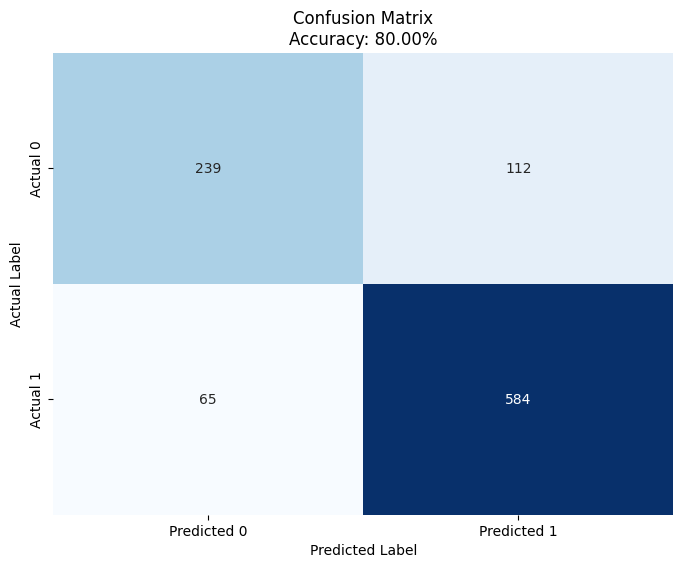

In [12]:
#..........ANN with k-fold cross validation and Results..........

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize Artificial Neural Network Classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    ann_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ann_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(overall_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Set labels and title
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Display the plot
plt.show()



In [ ]:
#...........ANN with Leave one Out Method and Results

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize Artificial Neural Network Classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    ann_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ann_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce


Overall Metrics:
Overall Accuracy: 0.8290
Overall Precision: 0.8494
Overall Recall: 0.8952
Overall F1 Score: 0.8717

Overall Confusion Matrix:
[[248 103]
 [ 68 581]]


8. AdaBoost Classifier along with Cross Validation and Results

In [ ]:
# ........AdaBoost Classier with k-fold Cross Validation and Results......

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    adaboost_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = adaboost_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Metrics (Fold 11):
Accuracy: 0.8300
Precision: 0.8714
Recall: 0.8841
F1 Score: 0.8777
Confusion Matrix:
[[22  9]
 [ 8 61]]

Metrics (Fold 21):
Accuracy: 0.8400
Precision: 0.8387
Recall: 0.8966
F1 Score: 0.8667
Confusion Matrix:
[[32 10]
 [ 6 52]]

Metrics (Fold 31):
Accuracy: 0.8900
Precision: 0.8971
Recall: 0.9385
F1 Score: 0.9173
Confusion Matrix:
[[28  7]
 [ 4 61]]

Metrics (Fold 41):
Accuracy: 0.8100
Precision: 0.8429
Recall: 0.8806
F1 Score: 0.8613
Confusion Matrix:
[[22 11]
 [ 8 59]]

Metrics (Fold 51):
Accuracy: 0.8700
Precision: 0.8904
Recall: 0.9286
F1 Score: 0.9091
Confusion Matrix:
[[22  8]
 [ 5 65]]

Metrics (Fold 61):
Accuracy: 0.8000
Precision: 0.8358
Recall: 0.8615
F1 Score: 0.8485
Confusion Matrix:
[[24 11]
 [ 9 56]]

Metrics (Fold 71):
Accuracy: 0.7800
Precision: 0.8387
Recall: 0.8125
F1 Score: 0.8254
Confusion Matrix:
[[26 10]
 [12 52]]

Metrics (Fold 81):
Accuracy: 0.7400
Precision: 0.7812
Recall: 0.8065
F1 Score: 0.7937
Confusion Matrix:
[[24 14]

In [ ]:
#...........AdaBoos Classifier with Leave one oUt Method and Results.........
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    adaboost_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = adaboost_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 10)
(1000,)

Overall Metrics:
Overall Accuracy: 0.8230
Overall Precision: 0.8533
Overall Recall: 0.8783
Overall F1 Score: 0.8656

Overall Confusion Matrix:
[[253  98]
 [ 79 570]]


8. Ensemble Method with K-fold Cross Validation

(1000, 10)
(1000,)

Metrics (Fold 11):
Accuracy: 0.8100
Precision: 0.8289
Recall: 0.9130
F1 Score: 0.8690
Confusion Matrix:
[[18 13]
 [ 6 63]]

Metrics (Fold 21):
Accuracy: 0.7800
Precision: 0.7812
Recall: 0.8621
F1 Score: 0.8197
Confusion Matrix:
[[28 14]
 [ 8 50]]

Metrics (Fold 31):
Accuracy: 0.8700
Precision: 0.9062
Recall: 0.8923
F1 Score: 0.8992
Confusion Matrix:
[[29  6]
 [ 7 58]]

Metrics (Fold 41):
Accuracy: 0.8000
Precision: 0.8507
Recall: 0.8507
F1 Score: 0.8507
Confusion Matrix:
[[23 10]
 [10 57]]

Metrics (Fold 51):
Accuracy: 0.9200
Precision: 0.9189
Recall: 0.9714
F1 Score: 0.9444
Confusion Matrix:
[[24  6]
 [ 2 68]]

Metrics (Fold 61):
Accuracy: 0.8300
Precision: 0.8243
Recall: 0.9385
F1 Score: 0.8777
Confusion Matrix:
[[22 13]
 [ 4 61]]

Metrics (Fold 71):
Accuracy: 0.8600
Precision: 0.9310
Recall: 0.8438
F1 Score: 0.8852
Confusion Matrix:
[[32  4]
 [10 54]]

Metrics (Fold 81):
Accuracy: 0.7700
Precision: 0.7826
Recall: 0.8710
F1 Score: 0.8244
Confusion Matrix:
[[23 15]

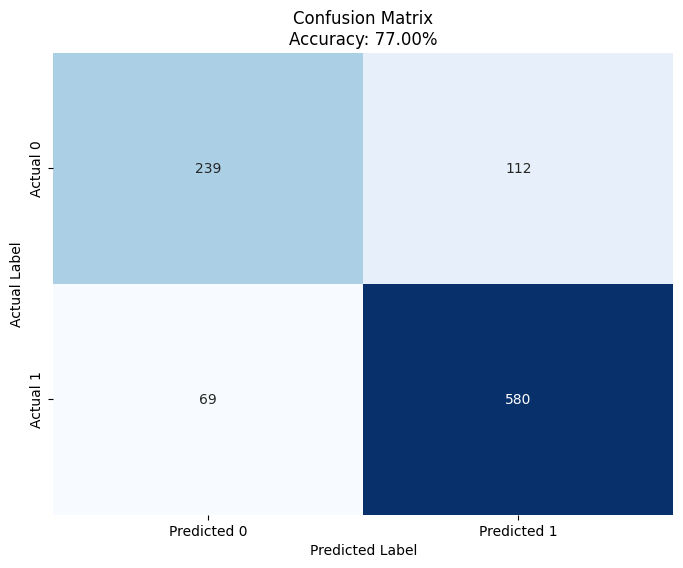

In [11]:
#...........Ensemble with K-fold Cross Validation and Results

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Define base classifiers for the ensemble
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
sgd_classifier = SGDClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Create a majority voting ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('ann', ann_classifier),
        #('dt', dt_classifier),
        ('svm', svm_classifier),
        ('nb', nb_classifier),
        ('knn', knn_classifier),
        ('sgd', sgd_classifier),
        ('rf', rf_classifier)
    ],
    voting='hard'
)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the ensemble model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ensemble_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)



# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(overall_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Set labels and title
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Display the plot
plt.show()





In [1]:
#........Ensemble method with K-fold cross Validation and Results..........

import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Define base classifiers for the ensemble
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
sgd_classifier = SGDClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Create a majority voting ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('ann', ann_classifier),
        ('dt', dt_classifier),
        ('svm', svm_classifier),
        ('nb', nb_classifier),
        ('knn', knn_classifier),
        ('sgd', sgd_classifier),
        ('rf', rf_classifier)
    ],
    voting='hard'
)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the ensemble model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ensemble_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each iteration
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each iteration
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each iteration
    print(f"\nMetrics (Iteration {len(all_predictions)}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


NameError: ignored